<a href="https://colab.research.google.com/github/milioe/CursoAnalitica/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de titanic

In [ ]:
!wget https://raw.githubusercontent.com/milioe/CursoAnalitica/main/Datasets/titanic.csv

--2022-05-16 03:42:36--  https://raw.githubusercontent.com/milioe/CursoAnalitica/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.003s  

2022-05-16 03:42:36 (12.6 MB/s) - ‘titanic.csv’ saved [44225/44225]



# 1. Business Understanding

# 2. Data Understanding

## `DataFrame`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
df = titanic.copy()

## Basics

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [ ]:
len(df)

887

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

## Supervivientes

In [ ]:
df["Survived"].value_counts()

0    545
1    342
Name: Survived, dtype: int64

El problema de los datos balanceados

## Valores únicos

In [ ]:
df["Pclass"].unique()

array([3, 1, 2])

In [ ]:
df["Name"].nunique()

887

In [ ]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 27.  , 54.  ,  2.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 23.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 24.  , 40.  , 48.  , 18.  , 66.  , 42.  , 21.  ,
        3.  , 30.  , 16.  ,  7.  , 49.  , 29.  , 65.  , 46.  , 28.5 ,
        5.  , 11.  , 45.  , 64.  , 17.  , 32.  , 25.  ,  0.83, 33.  ,
       59.  , 71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  ,
       36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 60.  , 61.  , 56.  ,
       50.  , 36.  , 45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 57.  ,
       23.5 ,  0.92, 43.  , 10.  , 13.  ,  0.75, 69.  , 53.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [ ]:
df["Siblings/Spouses Aboard"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
df["Parents/Children Aboard"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
df["Fare"].nunique()

248

## Plots

### Barras Categóricas

In [ ]:
import seaborn as sns

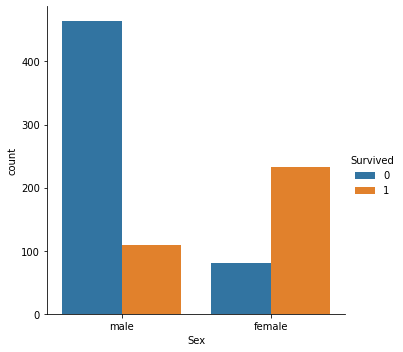

In [ ]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df);

### Mapa de calor Categórico

In [ ]:
# Agrupamos el dataset entre la clase y si sobrevivió o no
group = df.groupby(['Pclass', 'Survived'])

In [ ]:
group.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
dtype: int64

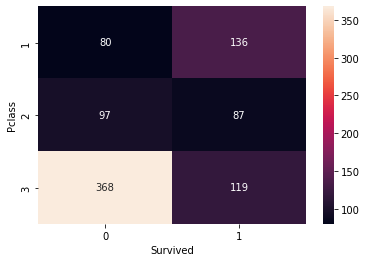

In [ ]:
pclass_survived = group.size().unstack()
 
 # Mapa de calor
sns.heatmap(pclass_survived, annot = True, fmt ="d");

### Factorplot

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


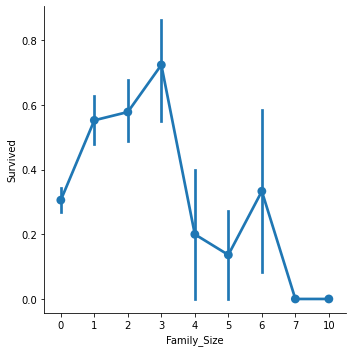

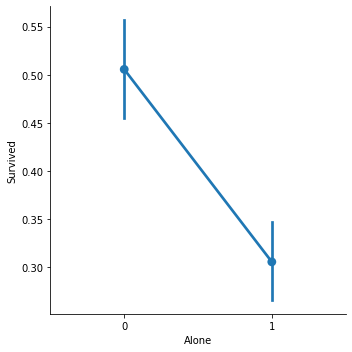

In [ ]:
# Añadimos la columna de "Family_Size"
df["Family_Size"] = 0
df["Family_Size"] = df["Siblings/Spouses Aboard"]+df["Parents/Children Aboard"]
 
# Añadimos la columna de "Alone"
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1
 
# Creamos el Factorplot
sns.factorplot(x ='Family_Size', y ='Survived', data = df);
 
# Creamos el Factorplot para alone
sns.factorplot(x ='Alone', y ='Survived', data = df);

### Barplot

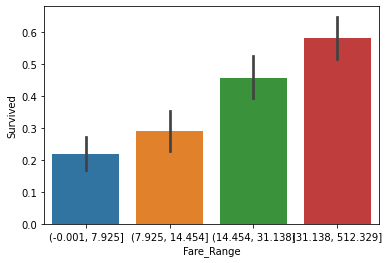

In [ ]:
# Dividimos el barplot en 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
 
# Creamos el barplot
sns.barplot(x ='Fare_Range', y ='Survived', data = df);

### Catplot

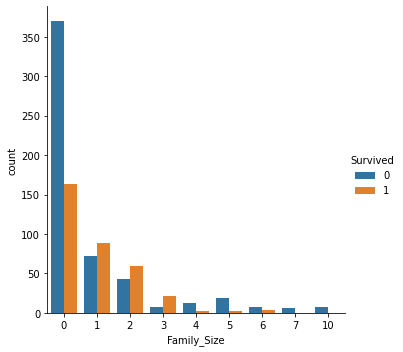

In [ ]:
sns.catplot(x ="Family_Size", hue ="Survived",
kind ="count", data = df);

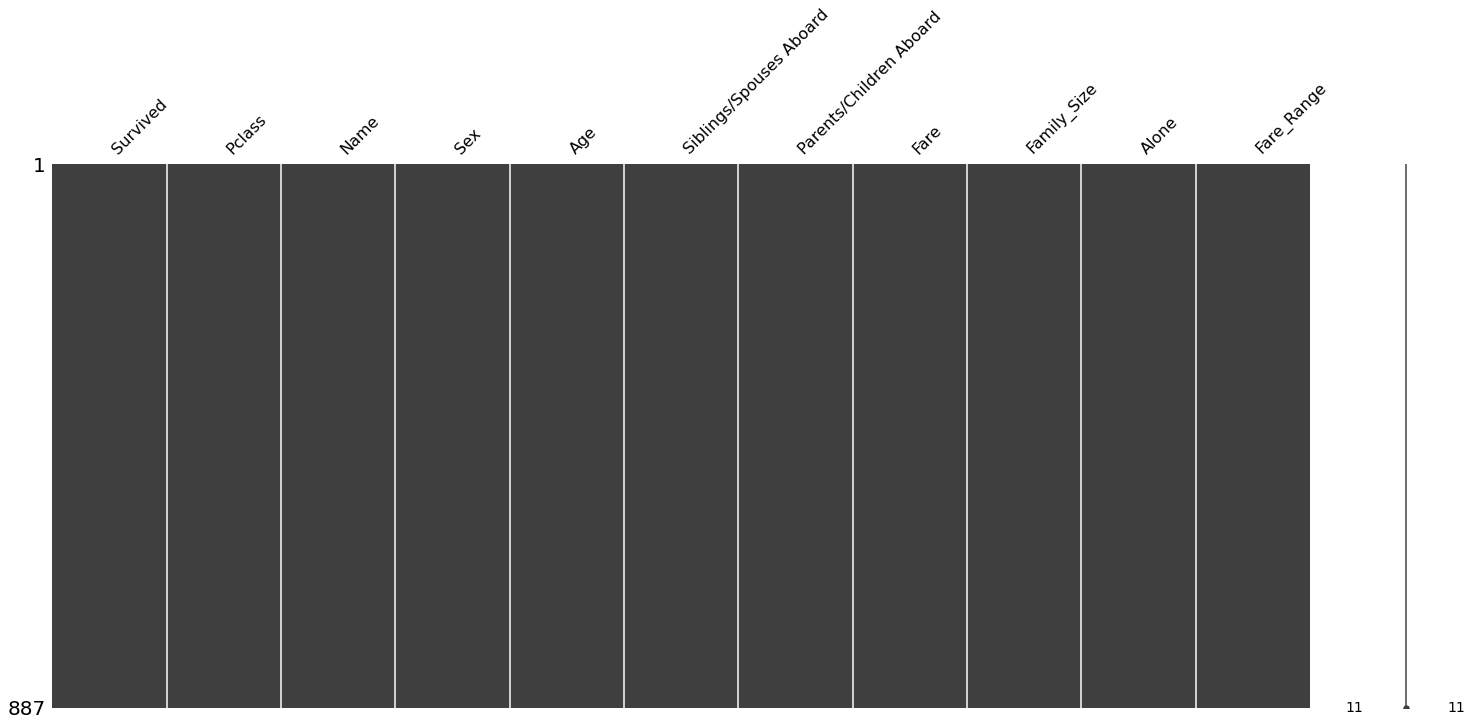

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Range
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,"(-0.001, 7.925]"
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0,"(31.138, 512.329]"
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,1,"(-0.001, 7.925]"
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0,"(31.138, 512.329]"
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,"(7.925, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,"(7.925, 14.454]"
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,0,1,"(14.454, 31.138]"
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,3,0,"(14.454, 31.138]"
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,"(14.454, 31.138]"


In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(df, color="Survived", labels={"Pclass": "Class"},
                              dimensions=["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare", "Family_Size"],
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=0.5)

fig.show()

In [ ]:
cor_mat = df.select_dtypes(exclude=("object", "category"))
cor_mat = px.imshow(cor_mat.corr())
cor_mat

## Queries

In [ ]:
df.query("Age<1")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Range
77,1,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000,2,0,"(14.454, 31.138]"
303,1,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500,3,0,"(31.138, 512.329]"
466,1,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583,3,0,"(14.454, 31.138]"
641,1,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583,3,0,"(14.454, 31.138]"
751,1,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000,2,0,"(14.454, 31.138]"
799,1,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.5167,1,0,"(7.925, 14.454]"
827,1,2,Master. George Sibley Richards,male,0.83,1,1,18.7500,2,0,"(14.454, 31.138]"


In [ ]:
df.query("Family_Size<1")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Range
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,1,"(-0.001, 7.925]"
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,"(7.925, 14.454]"
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1,"(7.925, 14.454]"
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1,"(31.138, 512.329]"
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500,0,1,"(14.454, 31.138]"
...,...,...,...,...,...,...,...,...,...,...,...
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500,0,1,"(-0.001, 7.925]"
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,"(7.925, 14.454]"
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,0,1,"(14.454, 31.138]"
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,"(14.454, 31.138]"


In [ ]:
df.query("Sex=='female'&Alone==1")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Range
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,1,"(-0.001, 7.925]"
11,1,1,Miss. Elizabeth Bonnell,female,58.0,0,0,26.5500,0,1,"(14.454, 31.138]"
14,0,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542,0,1,"(-0.001, 7.925]"
15,1,2,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.0000,0,1,"(14.454, 31.138]"
19,1,3,Mrs. Fatima Masselmani,female,22.0,0,0,7.2250,0,1,"(-0.001, 7.925]"
...,...,...,...,...,...,...,...,...,...,...,...
858,1,1,Mrs. Frederick Joel (Margaret Welles Barron) S...,female,48.0,0,0,25.9292,0,1,"(14.454, 31.138]"
861,1,2,Mrs. (Karolina) Bystrom,female,42.0,0,0,13.0000,0,1,"(7.925, 14.454]"
871,1,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250,0,1,"(-0.001, 7.925]"
878,0,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167,0,1,"(7.925, 14.454]"


In [ ]:
df.query("Sex=='male'&Alone==1")

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Range
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1,"(7.925, 14.454]"
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1,"(7.925, 14.454]"
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1,"(31.138, 512.329]"
12,0,3,Mr. William Henry Saundercock,male,20.0,0,0,8.0500,0,1,"(7.925, 14.454]"
17,1,2,Mr. Charles Eugene Williams,male,23.0,0,0,13.0000,0,1,"(7.925, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...
879,0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.5000,0,1,"(7.925, 14.454]"
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500,0,1,"(-0.001, 7.925]"
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0,1,"(7.925, 14.454]"
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0,1,"(14.454, 31.138]"


# 3. Data Preparation

In [ ]:
df["Sex"] = df["Sex"].astype('category')

df["Sex"] = df["Sex"].cat.codes

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Range
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500,1,0,"(-0.001, 7.925]"
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833,1,0,"(31.138, 512.329]"
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250,0,1,"(-0.001, 7.925]"
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000,1,0,"(31.138, 512.329]"
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500,0,1,"(7.925, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000,0,1,"(7.925, 14.454]"
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000,0,1,"(14.454, 31.138]"
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500,3,0,"(14.454, 31.138]"
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000,0,1,"(14.454, 31.138]"


In [ ]:
X = df[["Pclass", "Sex", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]]

In [ ]:
y = df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 4. Algorithm Selection

## Classifer Tree

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
y_preds_clf = clf.predict(X_test)

In [ ]:
#clf.predict_proba(X_test)

In [ ]:
score_clf = accuracy_score(y_test, y_preds_clf)

print(f"Precisión de Classifier Tree: {score_clf:.2%}")

Precisión de Classifier Tree: 73.03%


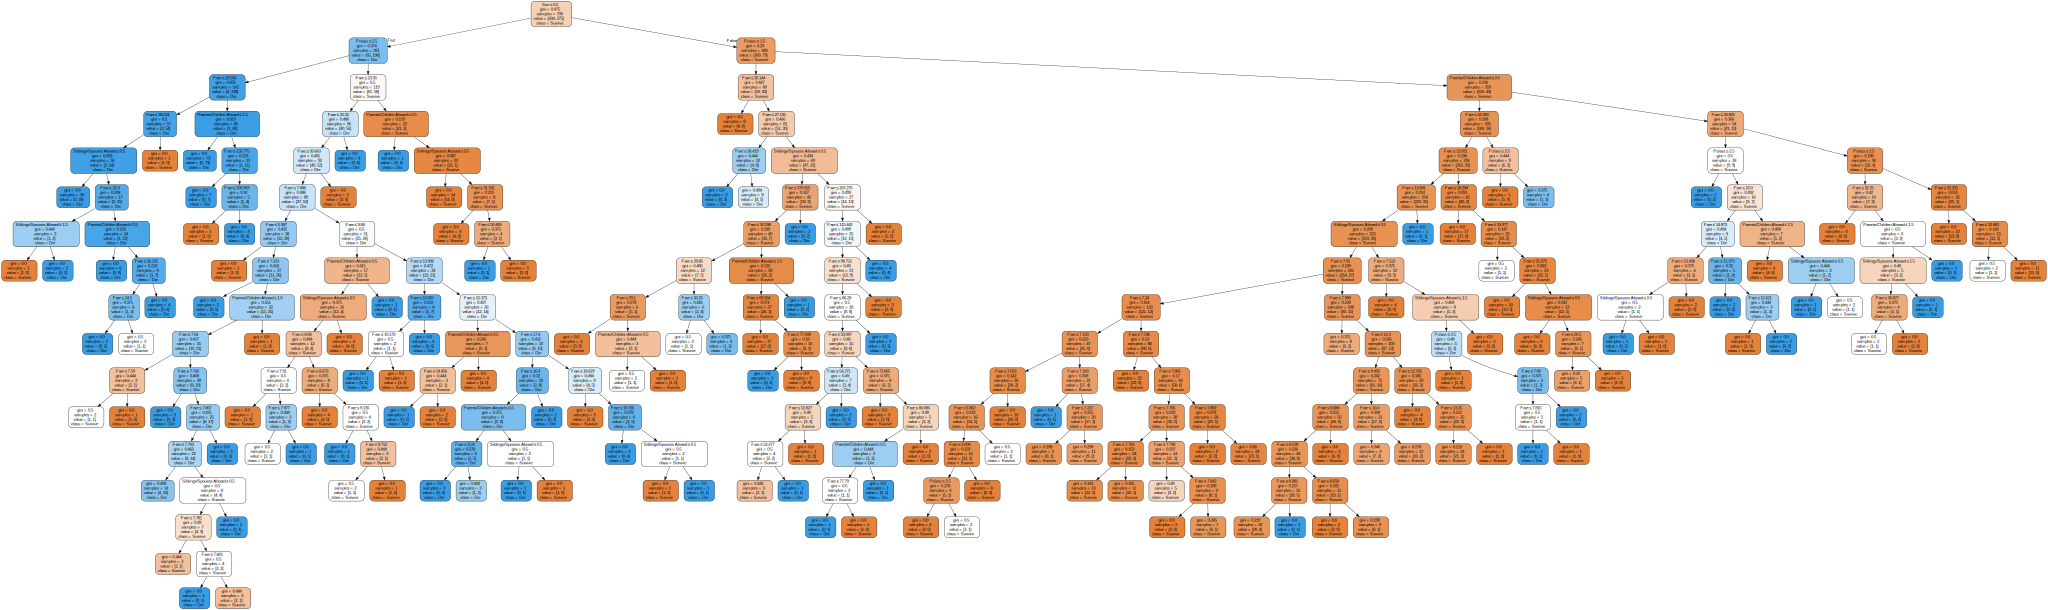

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,
                                class_names=["Survive", "Die"],  
                                filled=True, rounded=True,  
                                special_characters=True) 

graph = graphviz.Source(dot_data)  
graph 

## Baseline

In [ ]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Range
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500,1,0,"(-0.001, 7.925]"
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833,1,0,"(31.138, 512.329]"
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250,0,1,"(-0.001, 7.925]"
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000,1,0,"(31.138, 512.329]"
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500,0,1,"(7.925, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000,0,1,"(7.925, 14.454]"
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000,0,1,"(14.454, 31.138]"
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500,3,0,"(14.454, 31.138]"
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000,0,1,"(14.454, 31.138]"


In [ ]:
# 1 = Hombre, 0 = Mujer
y_preds_bl = np.where(X_test["Sex"] == 1, 0, 1)

In [ ]:
score_bl = accuracy_score(y_test, y_preds_bl)

print(f"Precisión de Baseline: {score_bl:.2%}")

Precisión de Baseline: 74.16%


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_preds_rfc = rfc.predict(X_test)

In [ ]:
score_rfc = accuracy_score(y_test, y_preds_rfc)

print(f"Precisión de Random Forest Classifier: {score_rfc:.2%}")

Precisión de Random Forest Classifier: 73.03%


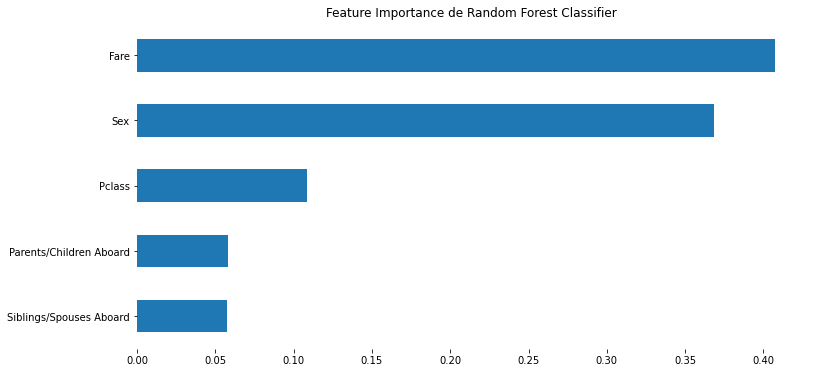

In [ ]:
feats_imp_rfc = pd.DataFrame(rfc.feature_importances_, index=X.columns, columns=['FeatureImportance'])
feats_imp_rfc = feats_imp_rfc.sort_values('FeatureImportance', ascending=False)

feats_imp_rfc.plot(kind='barh', figsize=(12,6), legend=False)
plt.title('Feature Importance de Random Forest Classifier')
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()

## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgboost = xgb.XGBClassifier()

xgboost.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_preds_xgb = xgboost.predict(X_test)

In [ ]:
score_xgb = accuracy_score(y_test, y_preds_xgb)

print(f"Precisión de XGBoost: {score_xgb}")

Precisión de XGBoost: 0.7528089887640449


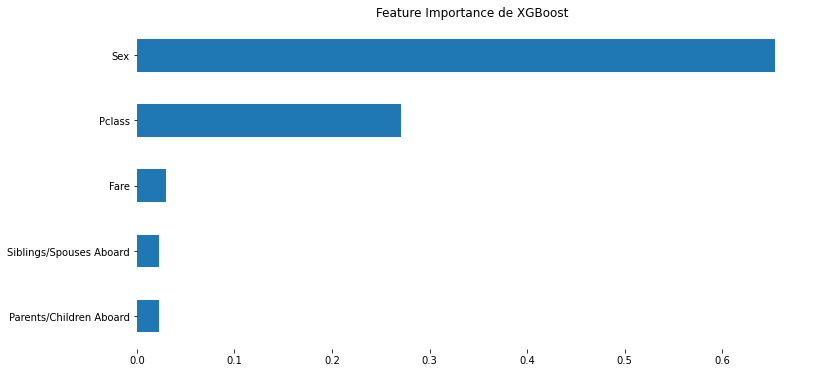

In [ ]:
feats_imp_xg = pd.DataFrame(xgboost.feature_importances_, index=X.columns, columns=['FeatureImportance'])
feats_imp_xg = feats_imp_xg.sort_values('FeatureImportance', ascending=False)

feats_imp_xg.plot(kind='barh', figsize=(12,6), legend=False)
plt.title('Feature Importance de XGBoost')
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()
plt.savefig("Variables_importancia_XG.png")

# 5. Evaluation

In [ ]:
# Scores

data_scores = pd.DataFrame({"Baseline":score_bl, "Classifier Tree":score_clf, "Random Forest":score_rfc, "XGBoost":score_xgb}, index=[0])
data_scores

,Baseline,Classifier Tree,Random Forest,XGBoost
0,0.741573,0.730337,0.730337,0.752809


In [ ]:
# Predcit_proba de cada modelo

y_proba_clf = clf.predict_proba(X_test)[::,1]
y_proba_rfc = rfc.predict_proba(X_test)[::,1]
y_proba_xgb = xgboost.predict_proba(X_test)[::,1]

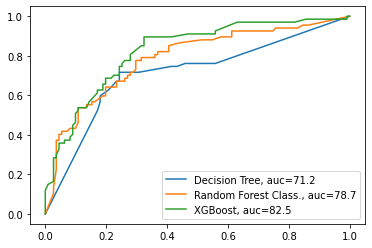

In [ ]:
from sklearn import metrics

# Classifier tree
fpr, tpr, thresh = metrics.roc_curve(y_test, y_proba_clf)
auc = metrics.roc_auc_score(y_test, y_proba_clf)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(round(auc, 3)*100))


fpr, tpr, thresh = metrics.roc_curve(y_test, y_proba_rfc)
auc = metrics.roc_auc_score(y_test, y_proba_rfc)
plt.plot(fpr,tpr,label="Random Forest Class., auc="+str(round(auc, 3)*100))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_proba_xgb)
auc = metrics.roc_auc_score(y_test, y_proba_xgb)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(round(auc, 3)*100))


plt.legend(loc=0);

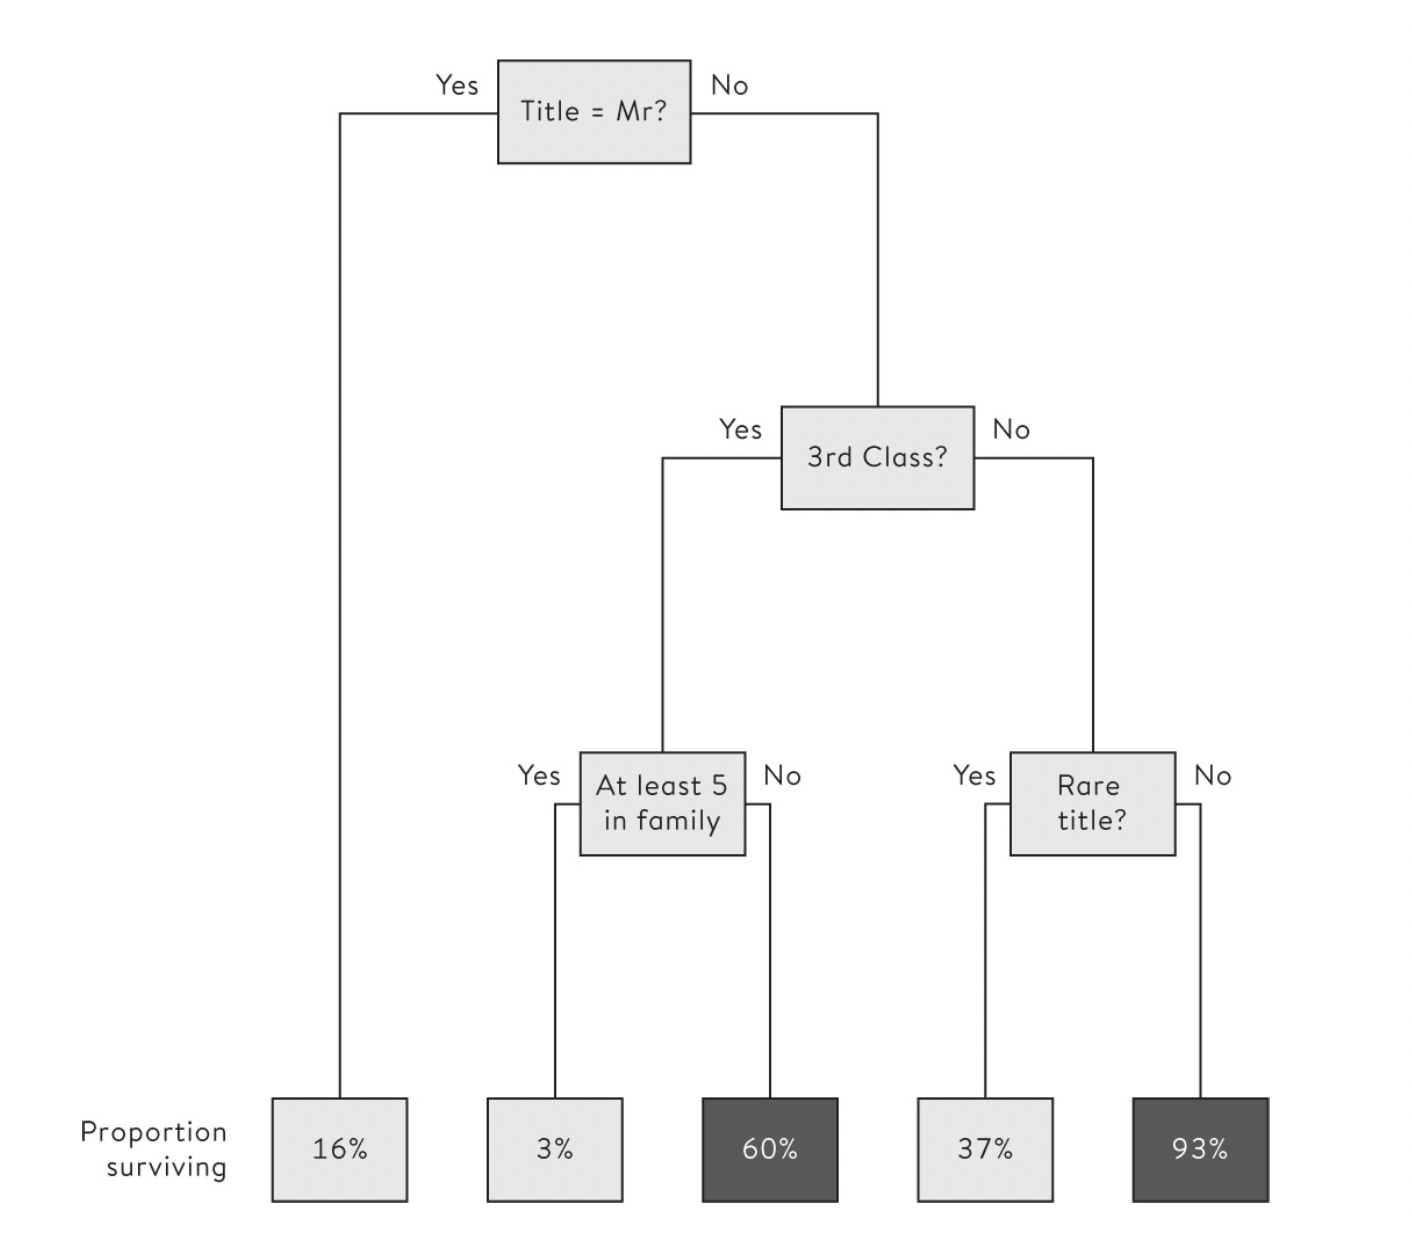

Obtenida de *The art of Statistic*, David Spiegelhalter

# 6. Deployment

In [ ]:
# Formato JSON
xgboost.save_model("model.json")

# Formato TXT
xgboost.save_model("model.txt")

In [ ]:
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model("model.json")